<a href="https://colab.research.google.com/github/junyealim/Homework/blob/main/%EA%B3%BC%EC%A0%9C_SportsBall_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'yeelimjun'
os.environ['KAGGLE_KEY'] = "fe2a189a3b020fea69e65369cb9a9d19"

In [ ]:
!kaggle datasets download -d samuelcortinhas/sports-balls-multiclass-image-classification

 96% 386M/401M [00:01<00:00, 234MB/s]
100% 401M/401M [00:02<00:00, 210MB/s]


In [ ]:
!unzip -q sports-balls-multiclass-image-classification

In [ ]:
# 필요한 모듈 준비
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [ ]:
# GPU 사용 확인
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
# 이미지 증강기법 사용
# data_transforms
# train / validation
data_transforms = {
    'train' : transforms.Compose([ # Compose : 한꺼번에 묶어서 실행
        transforms.Resize((224,224)),
        # (각도(처음 넣는 데이터라서 이름 생략), 찌그러뜨림, 크기(범위))
        transforms.RandomAffine(0, shear = 10, scale=(0.8, 1.2)),
        # 수평으로 뒤집기
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'validation' : transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()])
}

In [ ]:
# 데이터셋 객체 생성
# image_datasets
# train / validation

image_datasets = {
    # 키값 이름으로 데이터셋 객체가 만들어짐
    'train': datasets.ImageFolder('train', data_transforms['train']),
    'validation': datasets.ImageFolder('test', data_transforms['validation'])
}

In [ ]:
# 데이터로더 생성
# batch_size = 32
# shuffle=True

dataloaders = {
    'train' : DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation': DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

In [ ]:
print(len(image_datasets['train']), len(image_datasets['validation']))

7328 1841


'shuttlecock'

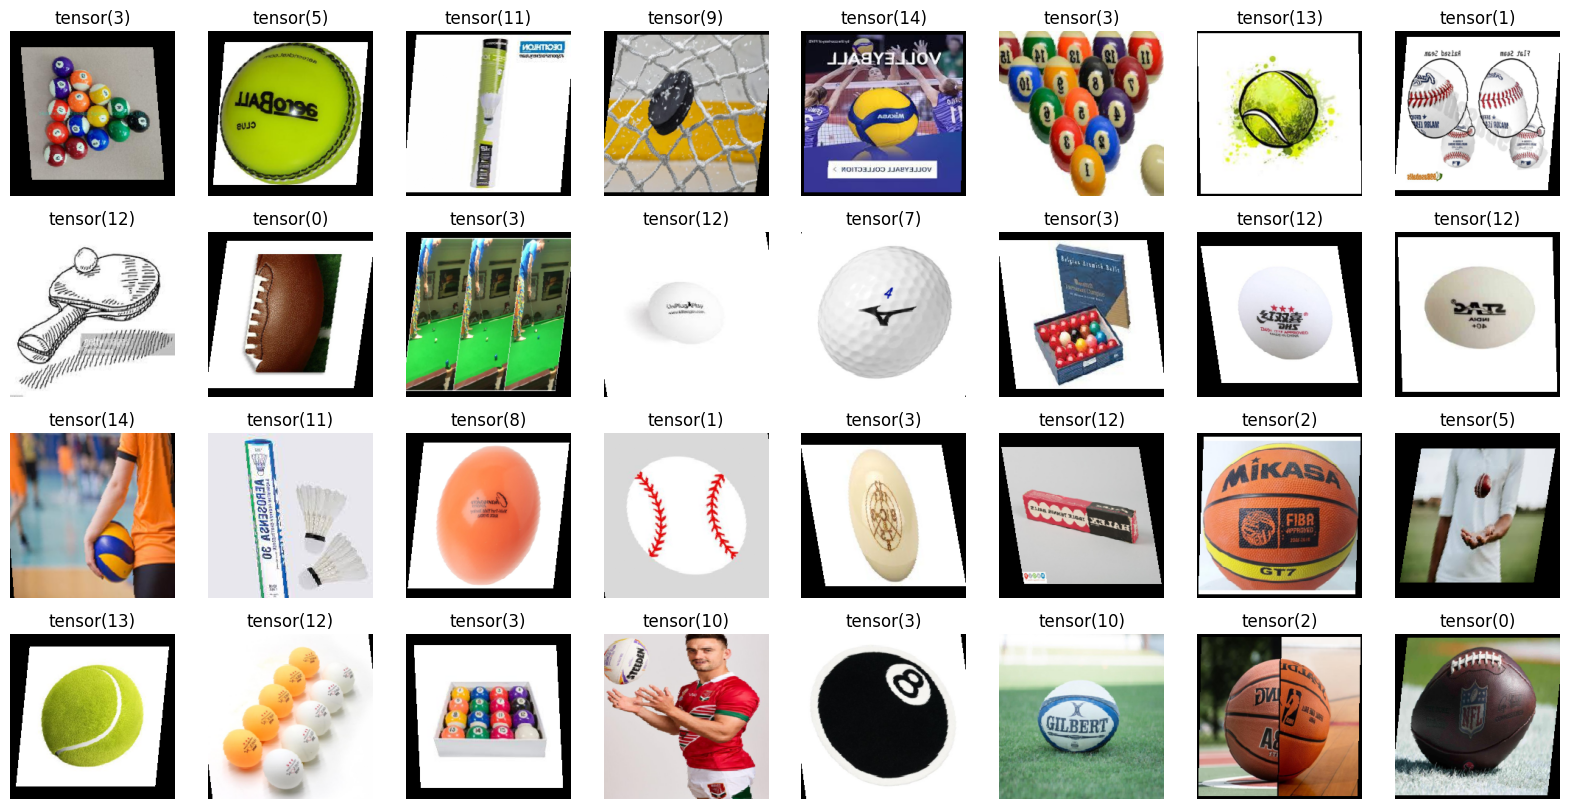

In [ ]:
# train 데이터 로더 확인
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(20,10))

for img, label,ax in zip(imgs, labels, axes.flatten()):
    ax.imshow(img.permute(1,2,0))
    ax.set_title(label)
    ax.axis('off')

image_datasets['train'].classes[11]

In [ ]:
model = models.resnet101(weights='IMAGENET1K_V2').to(device)
print(model)

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:01<00:00, 150MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
for param in model.parameters():
    param.requires_grad = False # 가져온 파라미터 (W, b)를 업데이트하지 않음

# Swish 활성화 함수를 정의합니다.
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

model.fc = nn.Sequential(
    nn.Linear(2048, 1052),
    nn.ReLU(),
    nn.Linear(1052, 526),
    Swish(),
    nn.Linear(526, 128),
    Swish(),
    nn.Linear(128, 15)
).to(device)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# train, test 한번에 돌리기
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
epochs = 10
for epoch in range(epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()
        else:
            model.eval()
        sum_losses = 0
        sum_accs = 0
        for x_batch, y_batch in dataloaders[phase]:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(x_batch)
            loss = nn.CrossEntropyLoss()(y_pred, y_batch)
            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            y_prob = nn.Softmax(1)(y_pred)
            y_pred_index = torch.argmax(y_prob, axis=1)
            acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100

            sum_losses = sum_losses + loss
            sum_accs = sum_accs + acc
        avg_loss = sum_losses / len(dataloaders[phase])
        avg_acc = sum_accs / len(dataloaders[phase])
        print(f'{phase:10s}: Epoch {epoch+1:4d}/{epochs} Loss: {avg_loss:.4f} Accuracy: {avg_acc: .2f}%')

train     : Epoch    1/10 Loss: 1.1059 Accuracy:  66.73%
validation: Epoch    1/10 Loss: 0.5816 Accuracy:  82.97%
train     : Epoch    2/10 Loss: 0.5789 Accuracy:  81.91%
validation: Epoch    2/10 Loss: 0.5268 Accuracy:  84.22%
train     : Epoch    3/10 Loss: 0.4300 Accuracy:  86.20%
validation: Epoch    3/10 Loss: 0.4748 Accuracy:  85.61%
train     : Epoch    4/10 Loss: 0.3441 Accuracy:  89.30%
validation: Epoch    4/10 Loss: 0.5020 Accuracy:  86.42%
train     : Epoch    5/10 Loss: 0.2961 Accuracy:  90.54%
validation: Epoch    5/10 Loss: 0.4738 Accuracy:  86.15%
train     : Epoch    6/10 Loss: 0.2516 Accuracy:  91.96%
validation: Epoch    6/10 Loss: 0.5222 Accuracy:  86.26%
train     : Epoch    7/10 Loss: 0.2272 Accuracy:  92.94%
validation: Epoch    7/10 Loss: 0.5130 Accuracy:  86.91%
train     : Epoch    8/10 Loss: 0.1890 Accuracy:  93.75%
validation: Epoch    8/10 Loss: 0.4941 Accuracy:  87.28%
train     : Epoch    9/10 Loss: 0.1731 Accuracy:  94.75%
validation: Epoch    9/10 Loss:

In [ ]:
# 학습된 모델 파일 저장
torch.save(model.state_dict(), 'Ball_model.pth')

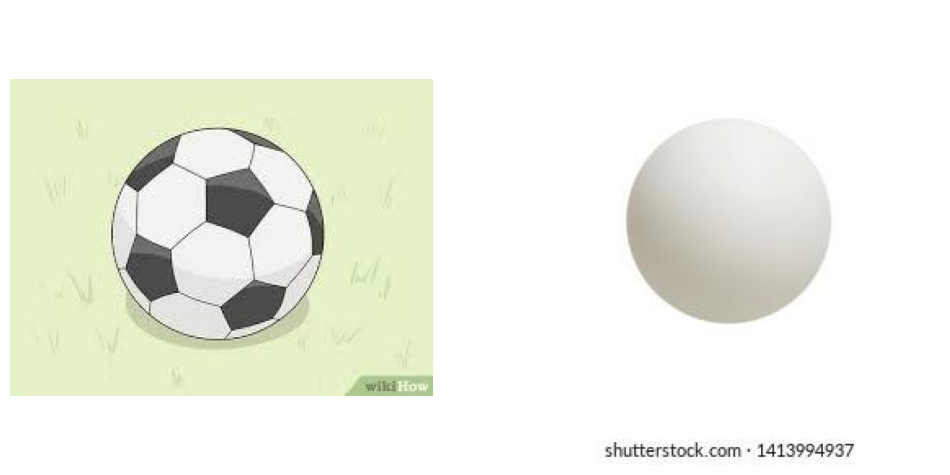

In [ ]:
from PIL import Image

img1 = Image.open('/content/test/football/football_173.jpg')
img2 = Image.open('/content/test/table_tennis_ball/table_tennis_ball_111.jpg')

fig, axes = plt.subplots(1,2, figsize = (12, 6))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()

In [ ]:
img1_input = data_transforms['validation'](img1)
img2_input = data_transforms['validation'](img2)
print(img1_input.shape)
print(img2_input.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [ ]:
test_batch = torch.stack([img1_input, img2_input])
test_batch = test_batch.to(device)
test_batch.shape

torch.Size([2, 3, 224, 224])

In [ ]:
y_pred = model(test_batch)
y_pred

tensor([[ -5.6983,  -4.9309,  -3.2750,  -6.6467,  -2.0278, -11.3451,  11.1686,
           3.0282,  -2.3807,  -3.1314,  -4.4323,  -2.2806,  -3.0560,  -2.4183,
           0.5066],
        [ -5.2683,  -3.8308,  -7.9619,  -2.1837,  -4.9242,   2.5414,  -9.7501,
          -3.5806,   2.3645,  -6.2594,  -6.6907,  -3.8946,  15.7416,  -3.5254,
          -1.2998]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y_prob = nn.Softmax(1)(y_pred)
probs, idx = torch.topk(y_prob, k=3)
print(probs)
print(idx)

tensor([[9.9968e-01, 2.9142e-04, 2.3409e-05],
        [1.0000e+00, 1.8503e-06, 1.5501e-06]], device='cuda:0',
       grad_fn=<TopkBackward0>)
tensor([[ 6,  7, 14],
        [12,  5,  8]], device='cuda:0')


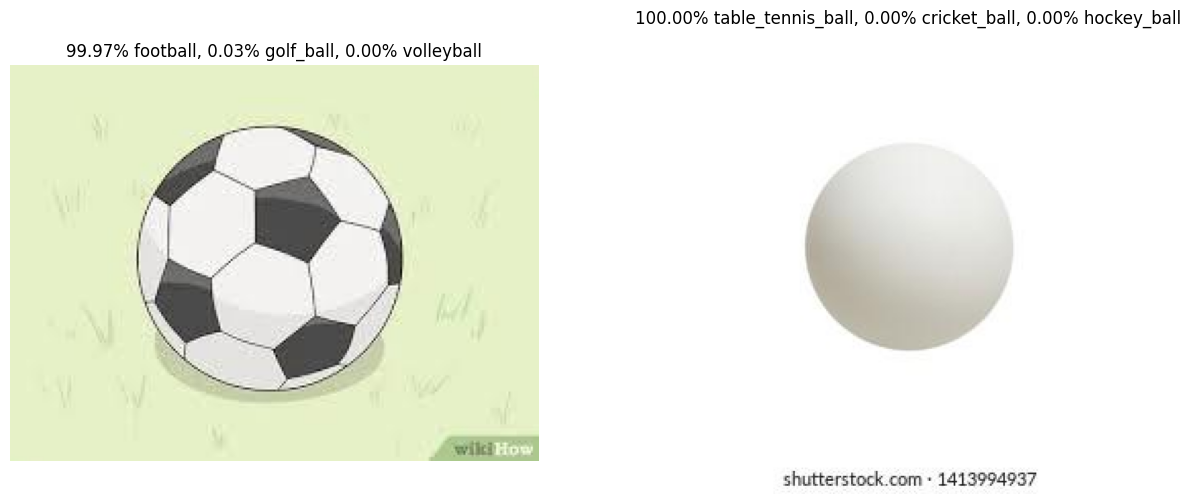

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100,
    image_datasets['validation'].classes[idx[0, 0]],
    probs[0, 1] * 100,
    image_datasets['validation'].classes[idx[0, 1]],
    probs[0, 2] * 100,
    image_datasets['validation'].classes[idx[0, 2]],
))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[1, 0] * 100,
    image_datasets['validation'].classes[idx[1, 0]],
    probs[1, 1] * 100,
    image_datasets['validation'].classes[idx[1, 1]],
    probs[1, 2] * 100,
    image_datasets['validation'].classes[idx[1, 2]],
))
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()

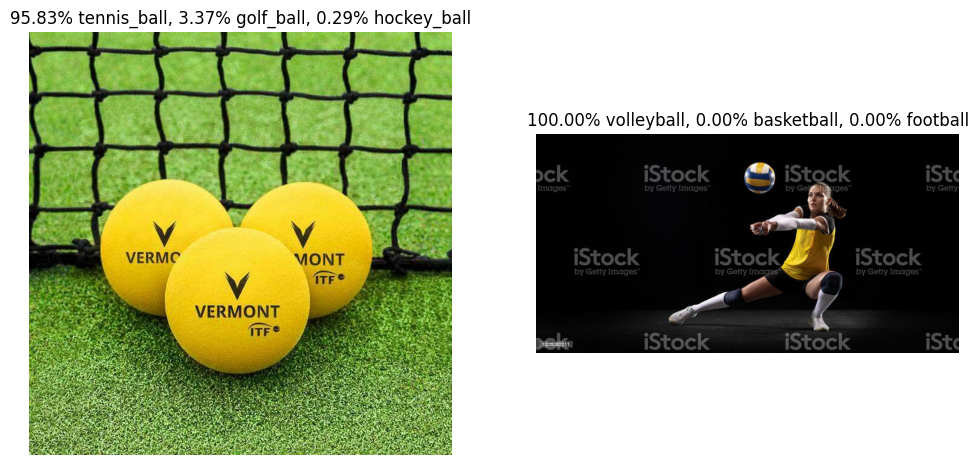

In [35]:
img3 = Image.open('/content/test/tennis_ball/tennis_17.jpg')
img4 = Image.open('/content/test/volleyball/volleyball_142.jpg')

img3_input = data_transforms['validation'](img3)
img4_input = data_transforms['validation'](img4)

test_batch = torch.stack([img3_input, img4_input])
test_batch = test_batch.to(device)

y_pred = model(test_batch)
y_prob = nn.Softmax(1)(y_pred)
probs, idx = torch.topk(y_prob, k=3)

fig, axes = plt.subplots(1,2, figsize = (12, 6))
axes[0].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100,
    image_datasets['validation'].classes[idx[0, 0]],
    probs[0, 1] * 100,
    image_datasets['validation'].classes[idx[0, 1]],
    probs[0, 2] * 100,
    image_datasets['validation'].classes[idx[0, 2]],
))
axes[0].imshow(img3)
axes[0].axis('off')
axes[1].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[1, 0] * 100,
    image_datasets['validation'].classes[idx[1, 0]],
    probs[1, 1] * 100,
    image_datasets['validation'].classes[idx[1, 1]],
    probs[1, 2] * 100,
    image_datasets['validation'].classes[idx[1, 2]],
))
axes[1].imshow(img4)
axes[1].axis('off')
plt.show()